<a href="https://colab.research.google.com/github/TeinkBR/1D_harmonic_oscillator/blob/main/Many_Body_Teink_using_pysindy_method_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import SymLogNorm, Normalize
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable

import numpy as np
from numpy import array, dot, diag, reshape
from scipy.linalg import eigvalsh
from scipy.integrate import odeint

from sympy import *
from pylab import *
import matplotlib.pyplot as plt
# First load the numpy/scipy/matplotlib
#load interactive widgets
import ipywidgets as widgets
from IPython.display import display
from scipy import interpolate
from math import exp                          #gaussian quadrature method                        
from scipy.special import hermite
from math import factorial
from sympy import diff, integrate, exp          
from scipy.misc import derivative              # import from scipy derivative 
from sympy.utilities.iterables import multiset_permutations
import pandas as pd
from tensorflow.keras import layers

# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'
from itertools import combinations
from numpy import linalg as LA

%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense


In [ ]:
class mb_hamiltonian:
    def __init__(self, delta, g, max_states):     #initialize class function with 

        self.delta=delta
        self.g=g
        self.max_states=max_states
    def mb_states(self,max_states):
        self.mb_state_list=np.arange(0,self.max_states,1)

        self.Hamiltonian_mb= np.zeros((len(self.mb_state_list),len(self.mb_state_list)))

        print("many body states",self.mb_state_list)
        for i in self.mb_state_list:
            for j in self.mb_state_list:
                if (i==j):
                    self.Hamiltonian_mb[i][j]=2*i*self.delta-self.g
                elif (i==-j):
                    self.Hamiltonian_mb[i][j]=0
                else:
                    self.Hamiltonian_mb[i][j]=-self.g/2
            

        print("Hamiltonian many body",pd.DataFrame(self.Hamiltonian_mb))
        

In [ ]:
for g_val in np.arange(0,10,0.25):
    for delta_val in range(1,10,1):
        for max_states in range(1,10,1):
            #print(g_val)
            d=mb_hamiltonian(g_val,delta_val,max_states)
d.mb_states(10)
#pickle.d.mb_states(10)

many body states [0 1 2 3 4 5 6 7 8]
Hamiltonian many body      0     1     2     3     4     5      6      7      8
0 -9.0  -4.5  -4.5  -4.5  -4.5  -4.5   -4.5   -4.5   -4.5
1 -4.5  10.5  -4.5  -4.5  -4.5  -4.5   -4.5   -4.5   -4.5
2 -4.5  -4.5  30.0  -4.5  -4.5  -4.5   -4.5   -4.5   -4.5
3 -4.5  -4.5  -4.5  49.5  -4.5  -4.5   -4.5   -4.5   -4.5
4 -4.5  -4.5  -4.5  -4.5  69.0  -4.5   -4.5   -4.5   -4.5
5 -4.5  -4.5  -4.5  -4.5  -4.5  88.5   -4.5   -4.5   -4.5
6 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  108.0   -4.5   -4.5
7 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5   -4.5  127.5   -4.5
8 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5   -4.5   -4.5  147.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
from tensorflow.python.keras.layers import Input, Dense
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input

print('d.mb_states(10)',d.mb_states(10))
x = d.Hamiltonian_mb
print('x',x)
y = model(x)

many body states [0 1 2 3 4 5 6 7 8]
Hamiltonian many body      0     1     2     3     4     5      6      7      8
0 -9.0  -4.5  -4.5  -4.5  -4.5  -4.5   -4.5   -4.5   -4.5
1 -4.5  10.5  -4.5  -4.5  -4.5  -4.5   -4.5   -4.5   -4.5
2 -4.5  -4.5  30.0  -4.5  -4.5  -4.5   -4.5   -4.5   -4.5
3 -4.5  -4.5  -4.5  49.5  -4.5  -4.5   -4.5   -4.5   -4.5
4 -4.5  -4.5  -4.5  -4.5  69.0  -4.5   -4.5   -4.5   -4.5
5 -4.5  -4.5  -4.5  -4.5  -4.5  88.5   -4.5   -4.5   -4.5
6 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  108.0   -4.5   -4.5
7 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5   -4.5  127.5   -4.5
8 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5   -4.5   -4.5  147.0
d.mb_states(10) None
x [[ -9.   -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  -4.5]
 [ -4.5  10.5  -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  -4.5]
 [ -4.5  -4.5  30.   -4.5  -4.5  -4.5  -4.5  -4.5  -4.5]
 [ -4.5  -4.5  -4.5  49.5  -4.5  -4.5  -4.5  -4.5  -4.5]
 [ -4.5  -4.5  -4.5  -4.5  69.   -4.5  -4.5  -4.5  -4.5]
 [ -4.5  -4.5  -4.5  -4.5  -4.5  88.5  -4.5  -4.5  -4

In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = d.Hamiltonian_mb
y = layer3(layer2(layer1(x)))


In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)


In [ ]:
model.pop()
print(len(model.layers))  # 2

2


In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [ ]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

In [ ]:
# Call layer on a test input
x = d.Hamiltonian_mb
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_3/kernel:0' shape=(9, 3) dtype=float32, numpy=
 array([[ 0.41079515, -0.04731894,  0.4967963 ],
        [-0.02059883, -0.4264103 , -0.33863845],
        [-0.08117974, -0.65614414,  0.66130346],
        [ 0.46164232, -0.66816324, -0.39496332],
        [-0.25353757,  0.08423114,  0.65510434],
        [-0.08813983,  0.49809545, -0.5044062 ],
        [ 0.63866454, -0.06868792,  0.21588981],
        [ 0.03826779, -0.4233012 , -0.12902784],
        [ 0.1151287 ,  0.06631267,  0.14432496]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = d.Hamiltonian_mb
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


In [ ]:
model.summary()
#print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (9, 2)                    20        
                                                                 
 dense_5 (Dense)             (9, 3)                    9         
                                                                 
 dense_6 (Dense)             (9, 4)                    16        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      2432      
                            

In [ ]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


shape of x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.


 (9, 9)


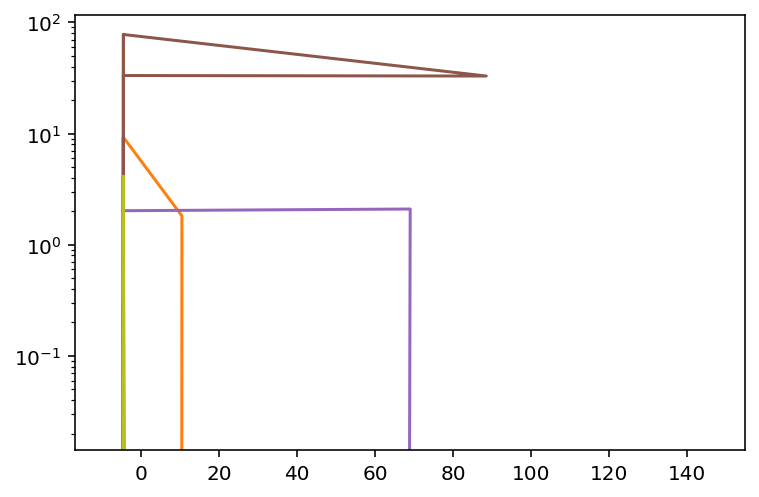

In [ ]:
plt.plot(x,y)
print('shape of x',np.shape(x))
plt.yscale('log')

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape= np.reshape(np.shape(x)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)



feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)



print('feature_extractor',type(feature_extractor))

# Call feature extractor on test input.
x = d.Hamiltonian_mb
features = feature_extractor(x.tolist)

AttributeError: ignored

In [ ]:
tf.keras.Sequential(layers=None, name=None)
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify the input shape, the model gets built
# continuously as you are adding layers:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights)
# Returns "4"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.build((None, 16))
len(model.weights)
# Returns "4"

# Note that when using the delayed-build pattern (no input shape specified),
# the model gets built the first time you call `fit`, `eval`, or `predict`,
# or the first time you call the model on some input data.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

In [ ]:
pip install pysindy

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import solve_ivp
from scipy.io import loadmat
import pandas as pd

import pysindy as ps

In [ ]:
# Load .mat file with the POD data
data = d.Hamiltonian_mb
t_dns = data.flatten()
dt_dns = t_dns[1] - t_dns[0]
a_dns = data
singular_vals = data.flatten()

# Plot singular values, sorted by energy content and normalized to the sum
plt.figure(figsize=(8, 3))
plt.semilogy(1 + np.arange(len(singular_vals)), 
             singular_vals / sum(singular_vals), 'k.')
plt.grid()
plt.xlim([0, 80])
plt.ylim([1e-6, 1e0])
plt.ylabel("% energy")
plt.xlabel("Mode index")

In [ ]:
# Basic power spectral density estimate using FFT
def psd_est(E, dt=1):
    Ehat = np.abs((dt * np.fft.fft(E)) ** 2)
    Ehat = Ehat[:int(len(Ehat) / 2)]
    N = len(Ehat)
    freq = 2 * np.pi * np.arange(N) / (2 * dt * N)  # Frequencies in rad/s
    return Ehat, freq

E_dns = np.sum(a_dns ** 2, axis=1)  # kinetic energy
psd, freq = psd_est(E_dns, dt=dt_dns)
    
# Plot the power spectral density
plt.figure(figsize=(12, 2.5))
plt.semilogy(freq, psd, 'k', lw=3)
plt.xlim([0, 28])
plt.ylim([1e-10, 1e-2])
plt.xlabel('$\omega$')
plt.ylabel('$\log(E)$')
plt.grid(True)